
# Project: Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#conclusions">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
   This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.




### Question(s) for Analysis
- What is the correlation Between Age and diseases ?
- Is there a correlation Betwen gender and atending appointments ?
- Does the Neighbourhood affect the awearness of patients ?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [250]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**



In [11]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

print(df.shape)
df.head()

(110527, 14)


PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

The data has a 110527 rows and 14 columns let's see if there is a duplicated rows



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No Nan value found 

In [13]:
#Renaming columns to ease manipulate later
df.rename(columns = {'No-show':'No_show'},inplace =True)

In [14]:
#check for duplicated row
df.duplicated().sum()

0

No Duplicated rows found 

In [15]:
#check for duplicated patient id
df['PatientId'].duplicated().sum()

48228

there are 48228 duplicated patient id we can remove them but we will check first if they will affect our analysis so we will check the status with show/no_show

In [16]:
df.duplicated(['PatientId','No_show']).sum()

38710

In [17]:
df.drop_duplicates(['PatientId','No_show'],inplace = True)
df.shape

(71817, 14)

removing columns we don't need (PatientId, AppointmentID, ScheduledDay,AppointmentDay)

In [18]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay'],axis = 1, inplace = True)


In [19]:
df.describe()

Age   Scholarship  Hipertension      Diabetes    Alcoholism  \
count  71817.000000  71817.000000  71817.000000  71817.000000  71817.000000   
mean      36.526978      0.095534      0.195065      0.070958      0.025036   
std       23.378518      0.293954      0.396254      0.256757      0.156235   
min       -1.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.000000      0.000000      0.000000      0.000000      0.000000   
50%       36.000000      0.000000      0.000000      0.000000      0.000000   
75%       55.000000      0.000000      0.000000      0.000000      0.000000   
max      115.000000      1.000000      1.000000      1.000000      1.000000   

            Handcap  SMS_received  
count  71817.000000  71817.000000  
mean       0.020135      0.335561  
std        0.155337      0.472190  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        4.000000      1.000000

we have some statistics from our data, but first we need to solve a single problem with min age -1 something is wrong let's find out what is it

In [20]:
df.query('Age == "-1"')

Gender  Age Neighbourhood  Scholarship  Hipertension  Diabetes  \
99832      F   -1         ROMÃO            0             0         0   

       Alcoholism  Handcap  SMS_received No_show  
99832           0        0             0      No

In [21]:
df.drop(index = 99832 ,inplace = True)

we removed the -1 age

In [22]:
#let's check again
df.describe()

Age   Scholarship  Hipertension      Diabetes    Alcoholism  \
count  71816.000000  71816.000000  71816.000000  71816.000000  71816.000000   
mean      36.527501      0.095536      0.195068      0.070959      0.025036   
std       23.378262      0.293956      0.396256      0.256758      0.156236   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.000000      0.000000      0.000000      0.000000      0.000000   
50%       36.000000      0.000000      0.000000      0.000000      0.000000   
75%       55.000000      0.000000      0.000000      0.000000      0.000000   
max      115.000000      1.000000      1.000000      1.000000      1.000000   

            Handcap  SMS_received  
count  71816.000000  71816.000000  
mean       0.020135      0.335566  
std        0.155338      0.472191  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        4.000000      1.000000

That's better now our data tells us a lot max age is 115, the mean age is 36.5, median age is 36, half of the patient aged between 17 and 55 and about 30% of patient recieved sms.

In [23]:
male = df.Gender == 'M'
female = df['Gender'] == 'F'
df[male].count(),df[female].count()

(Gender           25350
 Age              25350
 Neighbourhood    25350
 Scholarship      25350
 Hipertension     25350
 Diabetes         25350
 Alcoholism       25350
 Handcap          25350
 SMS_received     25350
 No_show          25350
 dtype: int64, Gender           46466
 Age              46466
 Neighbourhood    46466
 Scholarship      46466
 Hipertension     46466
 Diabetes         46466
 Alcoholism       46466
 Handcap          46466
 SMS_received     46466
 No_show          46466
 dtype: int64)

the data contain 25350 male patients and 46466 female patients

In [24]:
df.Age[male].mean(),df.Age[female].mean()

(33.147928994082839, 38.371260706753326)

The female mean is greater than male mean

<a id='eda'></a>
## Exploratory Data Analysis[No_show_appointments]


### Research Question 1 (General Look)

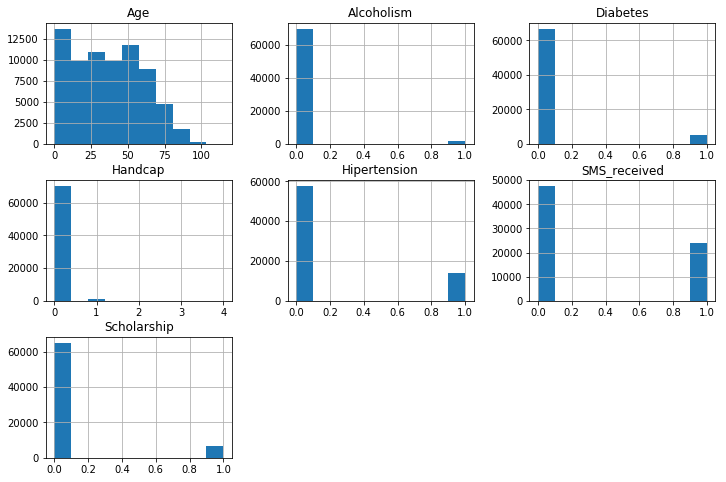

In [25]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize =(12,8));

majority doesn't have diabetes nor alcoholic nor hipertension
alot of people didn't recieved sms

## let's ask about the correlation between age and disease

In [26]:
hiper =df['Hipertension'] == True
df[hiper].count()

Gender           14009
Age              14009
Neighbourhood    14009
Scholarship      14009
Hipertension     14009
Diabetes         14009
Alcoholism       14009
Handcap          14009
SMS_received     14009
No_show          14009
dtype: int64

14009 patient have Hipertension

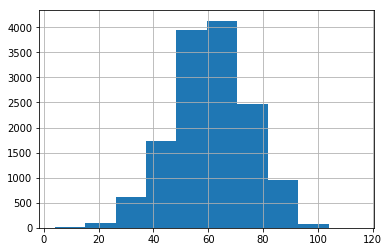

In [27]:
df[hiper].Age.hist();

The majority between 40 and 80 yrs old have Hipertension

In [28]:
Handcap = df['Handcap'] == True
df[Handcap].count()

Gender           1178
Age              1178
Neighbourhood    1178
Scholarship      1178
Hipertension     1178
Diabetes         1178
Alcoholism       1178
Handcap          1178
SMS_received     1178
No_show          1178
dtype: int64

1178 have Handcap

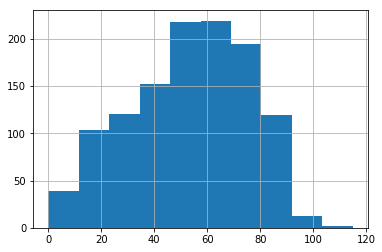

In [29]:
df[Handcap].Age.hist();

### Research Question 2  (What factors are important for us to know in order to predict if a patient will show up for  their scheduled appointment?)

In [30]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
show = df.No_show == 'No'
no_show = df.No_show == 'Yes'
df[show].count(),df[no_show].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hipertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hipertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

54153 patients appeared at their appoint and 17663 patients didn't appear

In [31]:
df[show].groupby(['Gender']).Age.count(),df[no_show].groupby(['Gender']).Age.count()

(Gender
 F    34960
 M    19193
 Name: Age, dtype: int64, Gender
 F    11506
 M     6157
 Name: Age, dtype: int64)

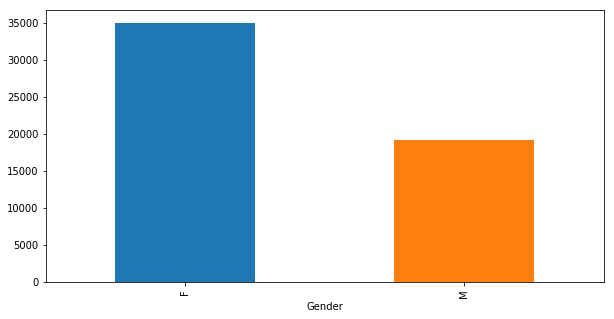

In [32]:
df[show].groupby(['Gender']).Age.count().plot(kind = 'bar',figsize = [10,5]);

34960 of people who attended their appointment were female and 19193 were male

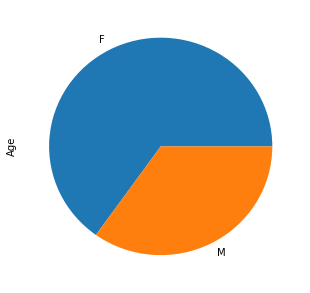

In [33]:
df[no_show].groupby(['Gender']).Age.count().plot(kind = 'pie', figsize=[5,5]);

11506 of people who didn't attend their appointment were female and 6157 were male

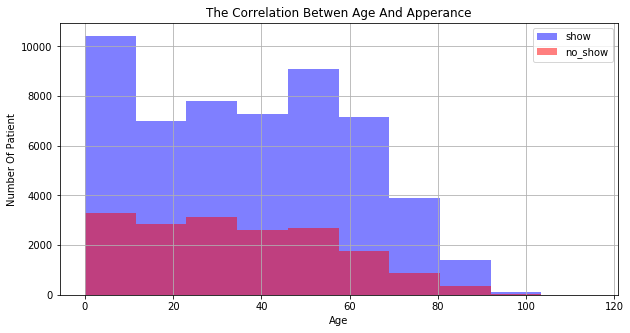

In [34]:
plt.figure(figsize = [10,5])
df.Age[show].hist(alpha = 0.5, bins = 10, label = 'show',color ='blue')
df.Age[no_show].hist(alpha = 0.5, bins = 10, label = 'no_show', color = 'red')
plt.legend();
plt.title('The Correlation Betwen Age And Apperance')
plt.xlabel('Age')
plt.ylabel('Number Of Patient');

as we can see patient from age 0 to age 60 are the highest to show at their appointment and after 60 the number start to decrease.
childern is the highest to attend their appointment.


In [35]:
df[show].mean(),df[no_show].mean()

(Age             37.229166
 Scholarship      0.091334
 Hipertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hipertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

we have a problem with the sms_received the mean of recieved sms of showed people is less than the mean of non showed people

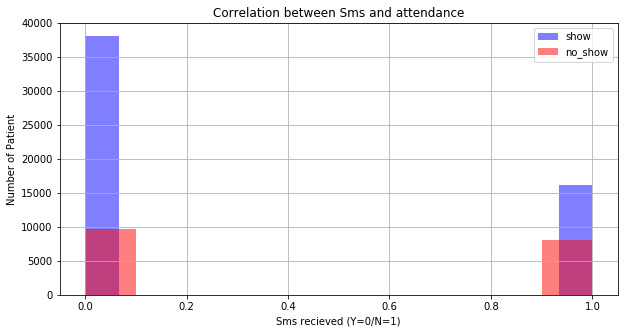

In [36]:
plt.figure(figsize = [10,5])
df['SMS_received'][show].hist(alpha = 0.5, bins = 15, label ='show',color = 'blue')
df['SMS_received'][no_show].hist(alpha = 0.5, bins = 10, label ='no_show',color = 'red')
plt.legend();
plt.title('Correlation between Sms and attendance')
plt.xlabel('Sms recieved (Y=0/N=1)')
plt.ylabel('Number of Patient');

Number of patient who recieved sms and attend their appointments is a way lower than the number of patient that didn't recieve sms and attended their appointments

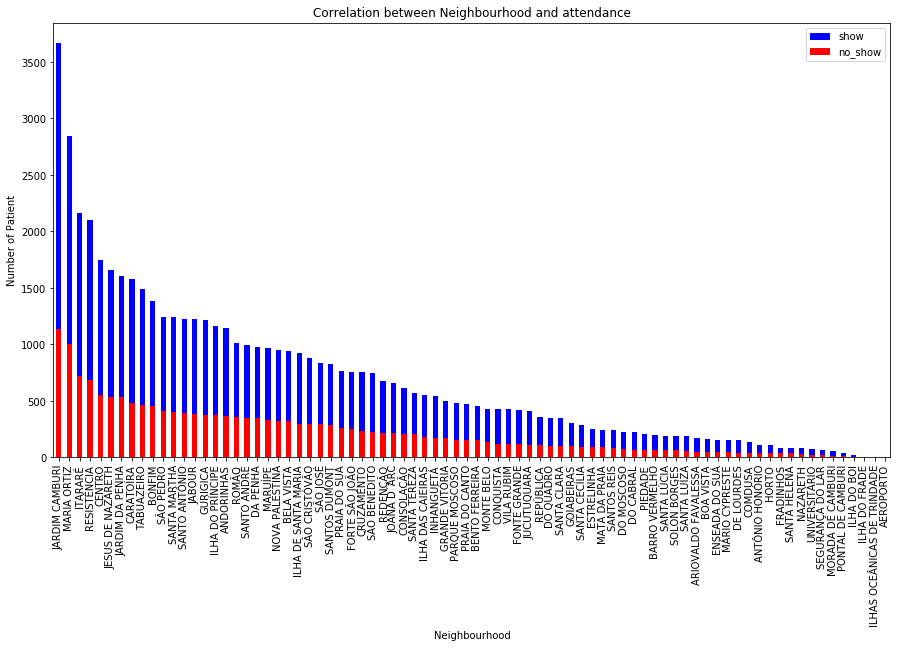

In [37]:
plt.figure(figsize = [15,8])
df.Neighbourhood[show].value_counts().plot(kind ='bar', label = 'show', color = 'blue' )
df.Neighbourhood[no_show].value_counts().plot(kind ='bar', label = 'no_show', color = 'red')
plt.legend()
plt.title('Correlation between Neighbourhood and attendance')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patient');

The neighbourhood effect the attendance we can dive more deeper about the correlation between neighbourhood attendance and sms recieved

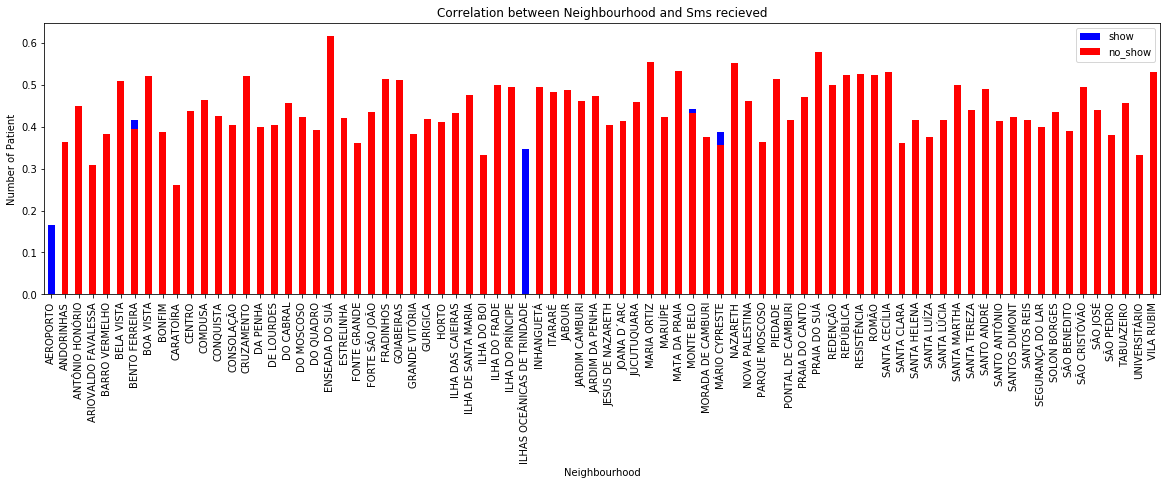

In [38]:
plt.figure(figsize = [20,5])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind ='bar', label = 'show', color = 'blue' )
df[no_show].groupby('Neighbourhood').SMS_received.mean().plot(kind ='bar', label = 'no_show', color = 'red')
plt.legend()
plt.title('Correlation between Neighbourhood and Sms recieved')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patient');

In [39]:
df['Neighbourhood'].nunique()

81

The sms effects on five Neighbourhood only out of 80 neighbourhood

In [50]:
df[show]['Scholarship'].value_counts(),df[no_show]['Scholarship'].value_counts()

(0    49207
 1     4946
 Name: Scholarship, dtype: int64, 0    15748
 1     1915
 Name: Scholarship, dtype: int64)

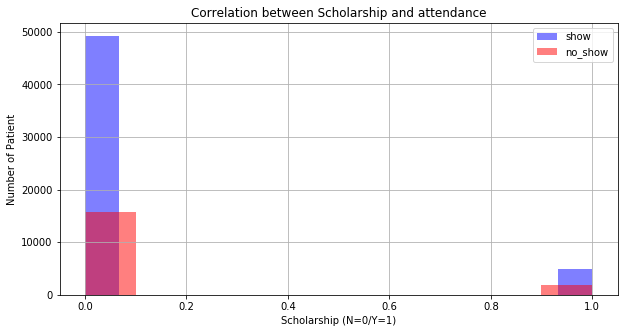

In [60]:
def scholarship(df,column_name,show,no_show):
    plt.figure(figsize = [10,5])
    df[column_name][show].hist(alpha = 0.5, bins = 15, label ='show',color = 'blue')
    df[column_name][no_show].hist(alpha = 0.5, bins = 10, label ='no_show',color = 'red')
    plt.legend();
    plt.title('Correlation between Scholarship and attendance')
    plt.xlabel('Scholarship (N=0/Y=1)')
    plt.ylabel('Number of Patient');
scholarship(df,'Scholarship',show,no_show)

people who don't has a scholarship attended more than people who has scholarship

<a id='conclusions'></a>
## Conclusions


>The neighbourhood effect the attendance JARDIM CAMBURI has the highest attendance rate.
> Number of showing patients without recieving SMS  is greater than showing patients with recieving SMS.
>More than 50% of patient are between 17 and 50 yrs old.
>Childern are the highest attendance rate. 
>The lowest attendance rate is from 65 yrs and above.
>Female patients are more likely to attend their appointment than male patients.


## Limitations

>NO clear correlation between showing and disease ,Age ,receiving sms, scholarship.

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0